<a href="https://colab.research.google.com/github/Driante/fantacalcio/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import io

In [ ]:
#la mia idea futura è rpendere direttamente il calendario dal sito, ma non so come farlo. Ora come ora bisogna scaricarselo a mano dal sito
#https://leghe.fantacalcio.it/legafantaboys/calendario e caricarlo
#eseguendo questa cella 
from google.colab import files
uploaded = files.upload()



Saving Calendario_Campionato---A-buon-rendere (1).xlsx to Calendario_Campionato---A-buon-rendere (1).xlsx


In [ ]:
#ora bisogna sbattersi a capire come funziona sto excel, in
df2 = pd.read_excel(io.BytesIO(uploaded['Calendario_Campionato---A-buon-rendere (1).xlsx']))

In [ ]:
df2

,Calendario Campionato - A buon rendere,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,https://leghe.fantacalcio.it/legafantaboys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1ª Giornata lega,NaN,4ª Giornata serie a,NaN,NaN,NaN,2ª Giornata lega,NaN,5ª Giornata serie a,NaN,NaN
3,Gargantua,64.0,83,Capitan Martella,0-5,NaN,Capitan Martella,74.5,75,Barriera-team,3-3
4,asdMalerba,74.0,79,CACCOLA F.C.,3-4,NaN,Atletico Manontroppo,82.5,75.5,Civediamoamaggio,5-3
...,...,...,...,...,...,...,...,...,...,...,...
87,35ª Giornata lega,NaN,38ª Giornata serie a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,asdMalerba,0.0,0,Civediamoamaggio,-,NaN,NaN,NaN,NaN,NaN,NaN
89,Atletico Manontroppo,0.0,0,Gargantua,-,NaN,NaN,NaN,NaN,NaN,NaN
90,Paris FC,0.0,0,Barriera-team,-,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fname = 'dataset.xlsx'
df = pd.read_excel(fname)
df = df.dropna() #drop the null values
df.goal = df.goal.astype(int) #convert data.goal in int (da float che era)
df.head()

FileNotFoundError: ignored

In [ ]:
data = df.copy() #creo una copia 
data.drop(columns=['fantapunti', 'subiti'], inplace=True) #drop unuseful variables
data = data.pivot(index='squadra', columns='giornata', values='goal') #reshape the dataset

In [ ]:
lenght, width = data.shape #larghezza del dataset
#rinominare le colonne 
nomi_colonne = []
for i in range(1,width+1):
    nomi_colonne.append('goal'+ str(i))
data.columns = nomi_colonne
data.sort_values(["squadra"], inplace=True) #per semplicità voglio ordinare le squadre in ordine alfabetico
data

,goal1,goal2,goal3,goal4,goal5,goal6,goal7,goal8,goal9,goal10,...,goal26,goal27,goal28,goal29,goal30,goal31,goal32,goal33,goal34,goal35
squadra,,,,,,,,,,,,,,,,,,,,,
ASDMalerba,1,2,0,1,1,2,1,1,2,7,...,2,0,2,0,1,3,4,1,3,5
Barriera-Team,4,0,3,5,3,0,2,0,0,4,...,1,2,0,1,2,8,1,3,2,2
Caccola,0,2,1,2,1,4,3,2,0,1,...,4,0,1,2,6,3,0,0,0,3
CapitanMartella,2,0,1,2,0,1,1,0,1,0,...,2,1,3,4,0,2,2,2,2,3
Civediamoamaggio,3,4,0,3,2,1,3,2,2,0,...,0,5,0,2,2,3,1,2,4,0
Gargantua,0,3,0,4,1,3,1,1,2,3,...,4,4,3,0,2,1,3,0,4,2
Paris,2,3,0,2,4,3,4,4,3,0,...,4,1,2,2,1,0,1,1,4,2
Pipita25,2,1,0,2,0,0,1,1,3,3,...,5,3,3,0,0,3,2,2,3,0


## Analisi vera e propria

In [ ]:
#ora che ho il dataset pronto, posso passare all'analisi
from itertools import permutations, product #permutations non serve ad un cazzo
from matplotlib import pyplot as plt #matplotlib
%matplotlib inline
import seaborn as sns #seaborn
plt.rcParams['figure.figsize'] = 15,5 #grandezza grafico

In [ ]:
lista_confronti=[]
for i in data.columns: #per ogni colonna (ogni giornata)...
    i = list(product(data[i], data[i])) #... paragonami ogni numero, quindi 64 (8*8) coppie per ogni giornata
    lista_confronti.append(i)

In [ ]:
giornate = len(lista_confronti) #quante partite abbiamo giorcato
matrici88_giornate = [] #matrici 8*8
for i in range(giornate): #cioè per ogni giornata
    for elementi in lista_confronti[i]: 
        elementi = elementi[0] - elementi[1] #goal fatto - subito, cioè le coppie che ho generato in lista_confronti (sopra)
        if elementi > 0: #vittoria
            elementi = 3
        elif elementi < 0: #sconfitta
            elementi = 0
        else:  #pareggio
            elementi = 1
        matrici88_giornate.append(elementi)
matrici88_giornate = np.array(matrici88_giornate).reshape((giornate, 8, 8)) 
#organizza la lista che hai appena creato nel seguente modo:
    #ci sono tante matrici 8*8 quante sono le giornate
matrici88_giornate #ogni matrice è una giornata
#(sulle righe di ogni matrice abbiamo la performance degli otto giocatori)

array([[[1, 0, 3, ..., 3, 0, 0],
        [3, 1, 3, ..., 3, 3, 3],
        [0, 0, 1, ..., 1, 0, 0],
        ...,
        [0, 0, 1, ..., 1, 0, 0],
        [3, 0, 3, ..., 3, 1, 1],
        [3, 0, 3, ..., 3, 1, 1]],

       [[1, 3, 1, ..., 0, 0, 3],
        [0, 1, 0, ..., 0, 0, 0],
        [1, 3, 1, ..., 0, 0, 3],
        ...,
        [3, 3, 3, ..., 1, 1, 3],
        [3, 3, 3, ..., 1, 1, 3],
        [0, 3, 0, ..., 0, 0, 1]],

       [[1, 0, 0, ..., 1, 1, 1],
        [3, 1, 3, ..., 3, 3, 3],
        [3, 0, 1, ..., 3, 3, 3],
        ...,
        [1, 0, 0, ..., 1, 1, 1],
        [1, 0, 0, ..., 1, 1, 1],
        [1, 0, 0, ..., 1, 1, 1]],

       ...,

       [[1, 0, 3, ..., 3, 1, 0],
        [3, 1, 3, ..., 3, 3, 3],
        [0, 0, 1, ..., 1, 0, 0],
        ...,
        [0, 0, 1, ..., 1, 0, 0],
        [1, 0, 3, ..., 3, 1, 0],
        [3, 0, 3, ..., 3, 3, 1]],

       [[1, 3, 3, ..., 0, 0, 1],
        [0, 1, 3, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [3, 3, 3, ..., 

In [ ]:
#creo questa matrice per togliere il punto che ad ogni giornata veniva precendentemente assegnato di default 
    #(questo accadeva perché tutti giocavano contro se stessi)
validation_matrix = np.ones([giornate,8,8])
d3, row, col = validation_matrix.shape
for k in range(d3):
    for i in range(row):
        for j in range(col):
            if i == j: 
                validation_matrix[k,i,j] = 0

matrici88_giornate = matrici88_giornate * validation_matrix

## I punti in ogni giornata

In [ ]:
#non ricordo come funziona la np.sum, con axis=2, funziona solo per 3D array, era nella lezione03_03 del corso LinkedIn
punti_giornata = matrici88_giornate.sum(axis=2)  
punti_giornata #ora ogni riga rappresenta una giornata, ogni colonna un giocatore, ma a me serve la trasposta

array([[ 6., 21.,  1., 11., 18.,  1., 11., 11.],
       [10.,  1., 10.,  1., 21., 16., 16.,  6.],
       [ 4., 21., 16., 16.,  4.,  4.,  4.,  4.],
       [ 0., 21.,  6.,  6., 15., 18.,  6.,  6.],
       [ 8., 18.,  8.,  1., 15.,  8., 21.,  1.],
       [12.,  1., 21.,  7.,  7., 16., 16.,  1.],
       [ 3., 12., 16.,  3., 16.,  3., 21.,  3.],
       [ 8.,  1., 16.,  1., 16.,  8., 21.,  8.],
       [11.,  1.,  1.,  6., 11., 11., 19., 19.],
       [21., 18.,  9.,  2.,  2., 13.,  2., 13.],
       [21.,  2., 12.,  2.,  2., 12., 12., 12.],
       [21.,  8.,  8.,  1., 15., 18.,  8.,  1.],
       [18., 21., 11., 11.,  2.,  2.,  2., 11.],
       [11.,  2., 11.,  2., 11., 18.,  2., 21.],
       [ 9.,  2., 12.,  2., 15., 18., 21.,  2.],
       [ 1., 19.,  9.,  1., 19.,  9.,  9.,  9.],
       [ 7., 13.,  1., 21.,  7., 18., 13.,  1.],
       [16., 10.,  2., 10., 21., 16.,  2.,  2.],
       [21.,  2., 18.,  2., 11., 11.,  2., 11.],
       [18.,  1.,  7.,  1., 13., 21., 13.,  7.],
       [ 8.,  1., 17

In [ ]:
punti_giornata = punti_giornata.T #ora ogni matrice rappresenta la performance di ogni giocatore nelle giornate
punti_giornata = pd.DataFrame(punti_giornata) 
punti_giornata.set_index(data.index, inplace=True)
punti_giornata.columns = data.columns

In [ ]:
#setto i nomi delle variabili, ora sono uguali ai nomi delle variabili del dataset originale
punti_giornata.columns = data.columns #ma voglio cambiare la parola 'goal' che non va bene
nuovi_nomi = []
for elementi in punti_giornata.columns:
    elementi = elementi.replace('goal','punti') #sostituisci la parola 'goal' con la parola 'punti'
    nuovi_nomi.append(elementi)
punti_giornata.columns = nuovi_nomi
punti_giornata = punti_giornata.astype(int) #trasformiamo i valori del dataframe in int
punti_giornata

,punti1,punti2,punti3,punti4,punti5,punti6,punti7,punti8,punti9,punti10,...,punti26,punti27,punti28,punti29,punti30,punti31,punti32,punti33,punti34,punti35
squadra,,,,,,,,,,,,,,,,,,,,,
ASDMalerba,6,10,4,0,8,12,3,8,11,21,...,7,1,10,2,7,12,21,7,10,21
Barriera-Team,21,1,21,21,18,1,12,1,1,18,...,3,12,1,9,14,21,5,21,4,8
Caccola,1,10,16,6,8,21,16,16,1,9,...,14,1,6,14,21,12,0,1,0,16
CapitanMartella,11,1,16,6,1,7,3,1,6,2,...,7,7,17,21,1,6,13,14,4,16
Civediamoamaggio,18,21,4,15,15,7,16,16,11,2,...,0,21,1,14,14,12,5,14,17,1
Gargantua,1,16,4,18,8,16,3,8,11,13,...,14,18,17,2,14,3,18,1,17,8
Paris,11,16,4,6,21,16,21,21,19,2,...,14,7,10,14,7,0,5,7,17,8
Pipita25,11,6,4,6,1,1,3,8,19,13,...,21,15,17,2,1,12,13,14,10,1


## Heatmap

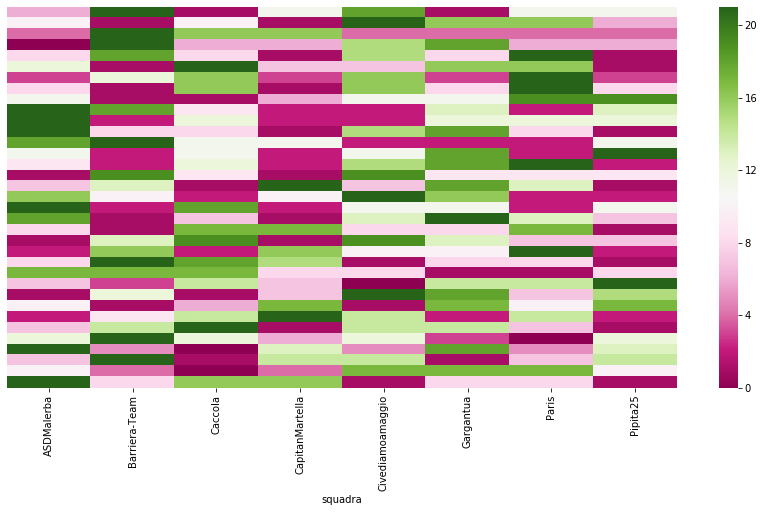

In [ ]:
plt.rcParams['figure.figsize'] = 15,7
sns.heatmap(punti_giornata.T, cmap="PiYG", xticklabels=punti_giornata.index, yticklabels=False); 
#at the bottom trovi le ultime giornate, in alto le prime 

## Classifica Finale

In [ ]:
#non sono sicuro che devo necessariamente trasformare il dataframe in np.matrix/array per poter sommare orizzontalmente
    #(axis=0 somma verticale)
classifica_finale = np.asmatrix(punti_giornata).sum(axis=1)

In [ ]:
data['classifica_finale'] = classifica_finale #aggiungo la classifica finale al dataset 
data.sort_values(["classifica_finale"], ascending=False, inplace=True) #ordinare dal più alto al più basso
classifica_finale = data['classifica_finale'] #per tenere solo la classifica (creo un altro dataset)
classifica_finale

squadra
Gargantua           393
Civediamoamaggio    386
Paris               364
Barriera-Team       361
ASDMalerba          360
Caccola             353
Pipita25            274
CapitanMartella     270
Name: classifica_finale, dtype: int32

In [ ]:
(classifica_finale/7).round(1)

squadra
Gargantua           56.1
Civediamoamaggio    55.1
Paris               52.0
Barriera-Team       51.6
ASDMalerba          51.4
Caccola             50.4
Pipita25            39.1
CapitanMartella     38.6
Name: classifica_finale, dtype: float64

## Barchart

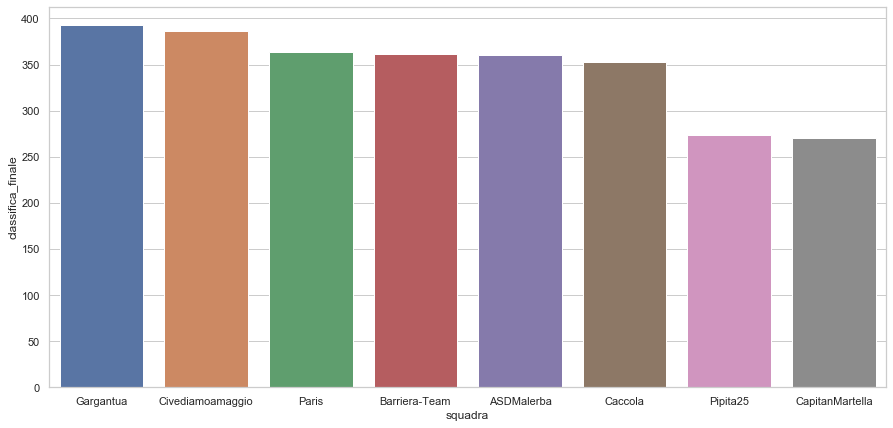

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
sns.barplot(x=data.index, y=data.classifica_finale);